In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['flower'] = iris.target
df['flower'] = df.flower.apply(lambda x: iris.target_names[x])
df[47:53]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor


In [10]:
df0 = df[df.flower == 'setosa']
df1 = df[df.flower == 'versicolor']
df2 = df[df.flower == 'virginica']
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


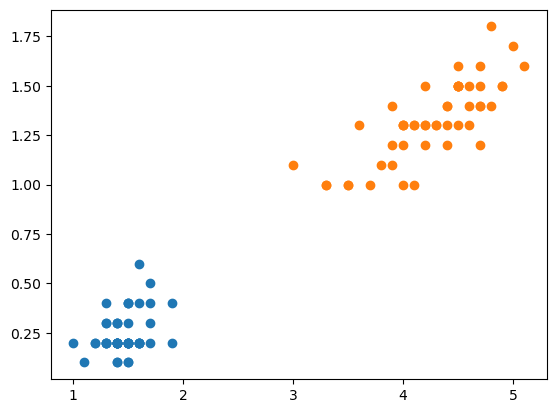

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop(['flower'], axis='columns')
y = iris.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9777777777777777

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

Text(50.722222222222214, 0.5, 'truth')

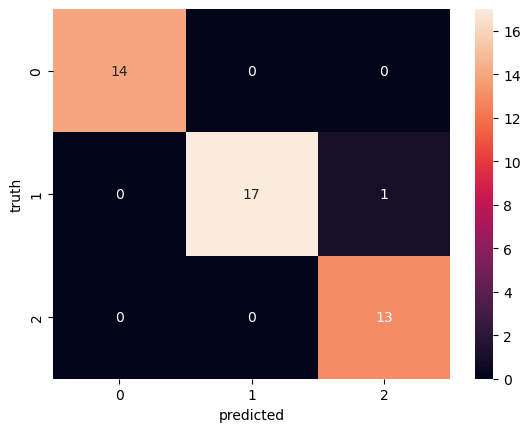

In [34]:
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [59]:
Practice Problem
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
digits = load_digits()
X = pd.DataFrame(digits.data, columns=digits.feature_names)
y = digits.target

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [68]:
k_rng = list(range(1,10))
param_grid = dict(n_neighbors=k_rng)
clf = GridSearchCV(KNeighborsClassifier(), param_grid, return_train_score=False, cv=5)
clf.fit(X_train,y_train)

# knn = KNeighborsClassifier()
# from sklearn.model_selection import GridSearchCV
# k_range = list(range(1, 31))
# param_grid = dict(n_neighbors=k_range)
  
# # defining parameter range
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# # fitting the model for grid search
# grid_search=grid.fit(x_train, y_train)

C:\Users\dhani\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dhani\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dhani\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dhani\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\dhani\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [69]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005052,0.001310,0.001704,0.000563,1,{'n_neighbors': 1},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.002812,0.000528,0.001025,0.000337,2,{'n_neighbors': 2},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.002513,0.000638,0.001220,0.000409,3,{'n_neighbors': 3},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.002308,0.000431,0.001110,0.000210,4,{'n_neighbors': 4},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0.001970,0.000569,0.001222,0.000442,5,{'n_neighbors': 5},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,0.002237,0.000438,0.000935,0.000639,6,{'n_neighbors': 6},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,0.002653,0.000547,0.001220,0.000391,7,{'n_neighbors': 7},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,0.002548,0.000674,0.000983,0.000022,8,{'n_neighbors': 8},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,0.002507,0.000746,0.000934,0.000179,9,{'n_neighbors': 9},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
